In [2]:
import nibabel as nib
import numpy as np
from PIL import Image
import os

def nii_to_png(nii_file_path, output_dir, axis=2, name='file'):
    """
    Convert a .nii.gz file to PNG images.

    Parameters:
        nii_file_path (str): Path to the .nii.gz file.
        output_dir (str): Directory to save the PNG images.
        axis (int): Axis along which to extract slices (0, 1, or 2).
    """
    # Load the .nii.gz file
    nii_img = nib.load(nii_file_path)
    data = nii_img.get_fdata()

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Normalize data to 0-255 for PNG format
    data = (data - np.min(data)) / (np.max(data) - np.min(data)) * 255
    data = data.astype(np.uint8)
    name=name.rstrip('.nii.gz.')
    # Loop through slices along the specified axis
    for i in range(data.shape[axis]):
        if axis == 0:
            slice_img = data[i, :, :]
        elif axis == 1:
            slice_img = data[:, i, :]
        else:  # axis == 2
            slice_img = data[:, :, i]

        # Convert slice to a PIL Image
        img = Image.fromarray(slice_img)
        # Save the image as PNG
        img.save(os.path.join(output_dir, f"{name}_{i:03d}_fullmask.png"))
    #print(slice_img.max())

    print(f"Images saved to {output_dir}")
    return(slice_img)
# Example usage
nii_file_path = '/ACDC/raw/labelsTr/patient001_frame01.nii.gz'
output_dir = './png/'




asd=nii_to_png(nii_file_path, output_dir, axis=2)


Images saved to ./png/


In [2]:
import matplotlib.pyplot as plt
np.unique(asd)

array([  0, 170, 255], dtype=uint8)

In [4]:
train_img=[f for f in os.listdir('/data/ACDC/raw/imagesTr/') if f.endswith('.nii.gz')]
train_mask=[f for f in os.listdir('/data/ACDC/raw/labelsTr/') if f.endswith('.nii.gz')]
test_img= [f for f in os.listdir('/data/ACDC/raw/imagesTs/') if f.endswith('.nii.gz')]
test_mask=[f for f in os.listdir('/data/ACDC/raw/labelsTs/') if f.endswith('.nii.gz')]

In [5]:
test_mask[1].rstrip('.nii.gz')

'patient103_frame01'

In [7]:
for file in test_mask:
    nii_file_path = '/data/ACDC/raw/labelsTs/'+str(file)
    output_dir = "./png/masksTs"
    nii_to_png(nii_file_path, output_dir, axis=2,name=file)

    print(file)

Images saved to ./png/masksTs
patient124_frame07.nii.gz
Images saved to ./png/masksTs
patient103_frame01.nii.gz
Images saved to ./png/masksTs
patient150_frame12.nii.gz
Images saved to ./png/masksTs
patient136_frame01.nii.gz
Images saved to ./png/masksTs
patient137_frame01.nii.gz
Images saved to ./png/masksTs
patient147_frame09.nii.gz
Images saved to ./png/masksTs
patient147_frame01.nii.gz
Images saved to ./png/masksTs
patient109_frame01.nii.gz
Images saved to ./png/masksTs
patient141_frame11.nii.gz
Images saved to ./png/masksTs
patient143_frame01.nii.gz
Images saved to ./png/masksTs
patient103_frame11.nii.gz
Images saved to ./png/masksTs
patient120_frame01.nii.gz
Images saved to ./png/masksTs
patient142_frame12.nii.gz
Images saved to ./png/masksTs
patient107_frame10.nii.gz
Images saved to ./png/masksTs
patient145_frame01.nii.gz
Images saved to ./png/masksTs
patient146_frame10.nii.gz
Images saved to ./png/masksTs
patient141_frame01.nii.gz
Images saved to ./png/masksTs
patient114_frame01

In [1]:
import nibabel as nib
import numpy as np
from PIL import Image
import os

def save_mask_as_png(mask_data, output_path, color_map):
    """
    Save a binary mask as a PNG image with a specific color.
    
    Parameters:
        mask_data (np.ndarray): The binary mask data (0s and 1s).
        output_path (str): Path where the PNG image will be saved.
        color_map (tuple): The RGB color to apply to the mask.
    """
    # Create an empty image with 3 channels (RGB)
    mask_img = np.zeros((mask_data.shape[0], mask_data.shape[1], 3), dtype=np.uint8)
    
    # Apply the color to the mask area
    mask_img[mask_data == 1] = color_map

    # Convert to a PIL image and save
    img = Image.fromarray(mask_img)
    img.save(output_path)

def nii_to_png(nii_file_path, output_dir, axis=2, name='file'):
    """
    Convert a .nii.gz file to PNG images with separate masks for different classes.
    
    Parameters:
        nii_file_path (str): Path to the .nii.gz file.
        output_dir (str): Directory to save the PNG images.
        axis (int): Axis along which to extract slices (0, 1, or 2).
    """
    # Load the .nii.gz file
    nii_img = nib.load(nii_file_path)
    data = nii_img.get_fdata()

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Normalize data to 0-255 for PNG format
    data = (data - np.min(data)) / (np.max(data) - np.min(data)) * 255
    data = data.astype(np.uint8)
    name=name.rstrip('.nii.gz.')

    # Loop through slices along the specified axis
    for i in range(data.shape[axis]):
        if axis == 0:
            slice_img = data[i, :, :]
        elif axis == 1:
            slice_img = data[:, i, :]
        else:  # axis == 2
            slice_img = data[:, :, i]

        # Here you would need to define the mask conditions
        # For example, let's assume:
        # - Mask 1 is for white (255)
        # - Mask 2 is for grey (170)
        # - Mask 3 is for dark grey (85)
        
        # Create three separate masks
        mask1 = (slice_img == 255).astype(np.uint8)  # White mask
        mask2 = (slice_img == 170).astype(np.uint8)  # Grey mask
        mask3 = (slice_img == 85).astype(np.uint8)   # Dark grey mask

        # Define color mappings
        white_color = (255, 255, 255)  # White
        #grey_color = (169, 169, 169)  # Grey
        #dark_grey_color = (169, 169, 169)  # Dark grey (you can adjust color)

        # Save each mask as a PNG
        save_mask_as_png(mask1, os.path.join(output_dir, f"{name}_{i:03d}_mask1.png"), white_color)
        save_mask_as_png(mask2, os.path.join(output_dir, f"{name}_{i:03d}_mask2.png"), white_color)
        save_mask_as_png(mask3, os.path.join(output_dir, f"{name}_{i:03d}_mask3.png"), white_color)

    print(f"Masks saved to {output_dir}")

# Example usage
nii_file_path = '/data/ACDC/raw/labelsTs/patient150_frame01.nii.gz'
output_dir = "./png"
nii_to_png(nii_file_path, output_dir, axis=2)


Masks saved to ./png


In [5]:
for file in test_mask:
    nii_file_path = '/data/ACDC/raw/labelsTs/'+str(file)
    output_dir = "./png/masksTs"
    nii_to_png(nii_file_path, output_dir, axis=2,name=file)

    print(file)

Masks saved to ./png/masksTs
patient124_frame07.nii.gz
Masks saved to ./png/masksTs
patient103_frame01.nii.gz
Masks saved to ./png/masksTs
patient150_frame12.nii.gz
Masks saved to ./png/masksTs
patient136_frame01.nii.gz
Masks saved to ./png/masksTs
patient137_frame01.nii.gz
Masks saved to ./png/masksTs
patient147_frame09.nii.gz
Masks saved to ./png/masksTs
patient147_frame01.nii.gz
Masks saved to ./png/masksTs
patient109_frame01.nii.gz
Masks saved to ./png/masksTs
patient141_frame11.nii.gz
Masks saved to ./png/masksTs
patient143_frame01.nii.gz
Masks saved to ./png/masksTs
patient103_frame11.nii.gz
Masks saved to ./png/masksTs
patient120_frame01.nii.gz
Masks saved to ./png/masksTs
patient142_frame12.nii.gz
Masks saved to ./png/masksTs
patient107_frame10.nii.gz
Masks saved to ./png/masksTs
patient145_frame01.nii.gz
Masks saved to ./png/masksTs
patient146_frame10.nii.gz
Masks saved to ./png/masksTs
patient141_frame01.nii.gz
Masks saved to ./png/masksTs
patient114_frame01.nii.gz
Masks save

In [5]:
img=nib.load('/data/ACDC/raw/labelsTs/patient149_frame01.nii.gz')

In [68]:
data=img.header

In [69]:
data.get_zooms() 


(1.40625, 1.40625, 10.0)

In [70]:

data.get_xyzt_units()


('mm', 'sec')

In [71]:
img_data = img.get_fdata()
print(img_data.shape)

img_data.shape
mid_slice_x=img_data[:,:,1]

(121, 121, 10)


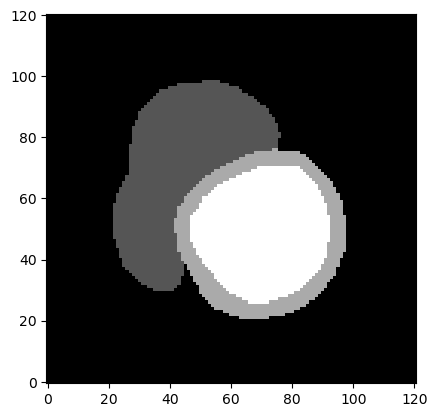

In [72]:
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')


In [73]:
img=nib.load('/data/ACDC/raw/imagesTs/patient150_frame12_0000.nii.gz')

In [74]:
img_data = img.get_fdata()
print(img_data.shape)

img_data.shape
mid_slice_x=img_data[:,:,1]

(87, 87, 8)


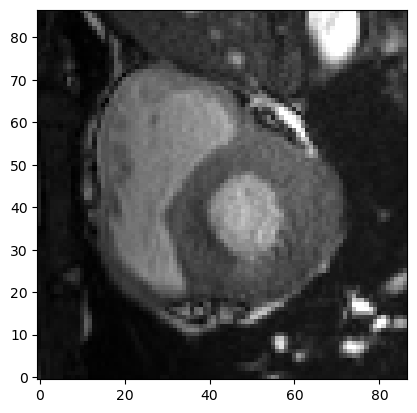

In [75]:
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
